## Information:

### Student ID: cqdv98

### Dataset: https://github.com/freeCodeCamp/2017-new-coder-survey/tree/ed8a2c5118209fa26cc823fd33fedcf6fe5661ec

## Import Libraries

In [306]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

## Load Data

In [307]:
# link to data
url = "https://github.com/freeCodeCamp/2017-new-coder-survey/blob/ed8a2c5118209fa26cc823fd33fedcf6fe5661ec/clean-data/2017-fCC-New-Coders-Survey-Data.csv?raw=true"

# read into dataframe
df = pd.read_csv(url, header = 0)

## Data Processing (with Descriptive Analytics)

In [308]:
# report number of participants
print('Number of survey participants:',len(df))

# look at data
display (df.head())

Number of survey participants: 18175


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,...,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,high school diploma or equivalent (GED),NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I work from home,Brazil,Brazil,software development and IT,NaN,Employed for wages,NaN,40000.0,0.0,NaN,male,NaN,0.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Portugal,Portugal,NaN,NaN,Not working but looking for work,NaN,140000.0,NaN,NaN,female,NaN,NaN,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,bachelor's degree,Information Technology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Transforming Data

In [309]:
# remove rows with null answers for necessary variables
df = df[df['ExpectedEarning'].notna()]
df = df[df['Income'].notna()]

# create new column for variable to be predicted (expected % increase in salary for first developer job)
df['ExpectedPercIncrease'] = round(100*df['ExpectedEarning']/df['Income'],2) - 100

# report how many respondents we have now
print('Number who reported expected earning and income:',len(df))

Number who reported expected earning and income: 2734


In [310]:
# convert 'Other' columns from string to binary (whether the participant used other resources)
df['CodeEventOther'][df['CodeEventOther'].notnull()] = 1
df['PodcastOther'][df['PodcastOther'].notnull()] = 1
df['ResourceOther'][df['ResourceOther'].notnull()] = 1
df['YouTubeOther'][df['YouTubeOther'].notnull()] = 1

# create a new column counting the number of events the participant found helpful
df['CodeEvents'] = df[['CodeEventConferences','CodeEventDjangoGirls','CodeEventFCC','CodeEventGameJam','CodeEventGirlDev',
                       'CodeEventHackathons','CodeEventMeetup','CodeEventNodeSchool','CodeEventOther','CodeEventRailsBridge',
                       'CodeEventRailsGirls','CodeEventStartUpWknd','CodeEventWkdBootcamps','CodeEventWomenCode',
                       'CodeEventWorkshops']].sum(axis=1)

# create a new column counting the number of podcasts the participant found helpful
df['Podcasts'] = df[['PodcastChangeLog','PodcastCodeNewbie','PodcastCodePen','PodcastDevTea','PodcastDotNET',
                     'PodcastGiantRobots','PodcastJSAir','PodcastJSJabber','PodcastOther','PodcastProgThrowdown',
                     'PodcastRubyRogues','PodcastSEDaily','PodcastSERadio','PodcastShopTalk','PodcastTalkPython',
                     'PodcastTheWebAhead']].sum(axis=1)

# create a new column counting the number of resources the participant found helpful
df['Resources'] = df[['ResourceCodecademy','ResourceCodeWars','ResourceCoursera','ResourceCSS','ResourceEdX',
                      'ResourceEgghead','ResourceFCC','ResourceHackerRank','ResourceKA','ResourceLynda',
                      'ResourceMDN','ResourceOdinProj','ResourceOther','ResourcePluralSight','ResourceSkillcrush',
                      'ResourceSO','ResourceTreehouse','ResourceUdacity','ResourceUdemy','ResourceW3S']].sum(axis=1)

# create a new column counting the number of youtube channels the participant found helpful
df['Videos'] = df[['YouTubeCodeCourse','YouTubeCodingTrain','YouTubeCodingTut360','YouTubeComputerphile',
                   'YouTubeDerekBanas','YouTubeDevTips','YouTubeEngineeredTruth','YouTubeFCC','YouTubeFunFunFunction',
                   'YouTubeGoogleDev','YouTubeLearnCode','YouTubeLevelUpTuts','YouTubeMIT','YouTubeMozillaHacks',
                   'YouTubeOther','YouTubeSimplilearn','YouTubeTheNewBoston']].sum(axis=1)

In [311]:
# removing all unnecessary features from the DataFrame
df = df.drop(columns=['BootcampFinish','BootcampLoanYesNo','BootcampName','BootcampRecommend','ChildrenNumber','CodeEventNone',
                      'CodeEventConferences','CodeEventDjangoGirls','CodeEventFCC','CodeEventGameJam','CodeEventGirlDev',
                      'CodeEventHackathons','CodeEventMeetup','CodeEventNodeSchool','CodeEventOther','CodeEventRailsBridge',
                      'CodeEventRailsGirls','CodeEventStartUpWknd','CodeEventWkdBootcamps','CodeEventWomenCode',
                      'CodeEventWorkshops','CountryCitizen','EmploymentFieldOther','EmploymentStatusOther',
                      'FinanciallySupporting','FirstDevJob','GenderOther','HasFinancialDependents','HasHighSpdInternet',
                      'HasServedInMilitary','HasStudentDebt','HomeMortgageOwe','ID.x','ID.y','IsReceiveDisabilitiesBenefits',
                      'IsSoftwareDev','IsUnderEmployed','JobInterestOther','JobRelocateYesNo','JobRoleInterest','LanguageAtHome',
                      'NetworkID','Part1EndTime','Part1StartTime','Part2EndTime','Part2StartTime','PodcastNone','PodcastChangeLog',
                      'PodcastCodeNewbie','PodcastCodePen','PodcastDevTea','PodcastDotNET','PodcastGiantRobots','PodcastJSAir',
                      'PodcastJSJabber','PodcastOther','PodcastProgThrowdown','PodcastRubyRogues','PodcastSEDaily',
                      'PodcastSERadio','PodcastShopTalk','PodcastTalkPython','PodcastTheWebAhead','ResourceCodecademy',
                      'ResourceCodeWars','ResourceCoursera','ResourceCSS','ResourceEdX','ResourceEgghead','ResourceFCC',
                      'ResourceHackerRank','ResourceKA','ResourceLynda','ResourceMDN','ResourceOdinProj','ResourceOther',
                      'ResourcePluralSight','ResourceSkillcrush','ResourceSO','ResourceTreehouse','ResourceUdacity',
                      'ResourceUdemy','ResourceW3S','StudentDebtOwe','YouTubeCodeCourse','YouTubeCodingTrain','YouTubeCodingTut360',
                      'YouTubeComputerphile','YouTubeDerekBanas','YouTubeDevTips','YouTubeEngineeredTruth','YouTubeFCC',
                      'YouTubeFunFunFunction','YouTubeGoogleDev','YouTubeLearnCode','YouTubeLevelUpTuts','YouTubeMIT',
                      'YouTubeMozillaHacks','YouTubeOther','YouTubeSimplilearn','YouTubeTheNewBoston'])

# convert null data to 0
df = df.fillna(0)

# keep copy of the data at this point
original_df = df.copy()

# look at transformed data
display (original_df.head())

,Age,AttendedBootcamp,CityPopulation,CommuteTime,CountryLive,EmploymentField,EmploymentStatus,ExpectedEarning,Gender,HasChildren,HasDebt,HasHomeMortgage,HoursLearning,Income,IsEthnicMinority,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobWherePref,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,ExpectedPercIncrease,CodeEvents,Podcasts,Resources,Videos
2,21.0,0.0,more than 1 million,15 to 29 minutes,United States of America,software development and IT,Employed for wages,70000.0,male,0.0,0.0,0.0,25.0,13000.0,1.0,Within 7 to 12 months,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,work for a medium-sized company,no preference,"single, never married",1000.0,5.0,high school diploma or equivalent (GED),0,438.46,2.0,4.0,6.0,5.0
3,26.0,0.0,"between 100,000 and 1 million",I work from home,Brazil,software development and IT,Employed for wages,40000.0,male,0.0,1.0,1.0,14.0,24000.0,0.0,Within the next 6 months,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,work for a medium-sized company,from home,married or domestic partnership,0.0,5.0,"some college credit, no degree",0,66.67,0.0,0.0,4.0,4.0
6,29.0,0.0,"between 100,000 and 1 million",30 to 44 minutes,United Kingdom,0,Employed for wages,30000.0,female,0.0,1.0,1.0,16.0,40000.0,0.0,I'm already applying,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,work for a medium-sized company,no preference,married or domestic partnership,0.0,12.0,"some college credit, no degree",0,-25.00,4.0,0.0,6.0,0.0
15,32.0,0.0,"less than 100,000",30 to 44 minutes,United States of America,sales,Employed for wages,40000.0,male,0.0,1.0,0.0,1.0,20000.0,0.0,more than 12 months from now,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,work for a nonprofit,in an office with other developers,"single, never married",0.0,1.0,master's degree (non-professional),English,100.00,0.0,1.0,2.0,0.0
16,29.0,0.0,"between 100,000 and 1 million",30 to 44 minutes,United States of America,finance,Employed for wages,60000.0,male,0.0,0.0,0.0,6.0,60000.0,0.0,Within the next 6 months,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,work for a medium-sized company,in an office with other developers,married or domestic partnership,200.0,12.0,master's degree (non-professional),Political Science,0.00,1.0,9.0,6.0,3.0


count     2734.000000
mean       128.202184
std        575.219016
min        -98.980000
25%          6.107500
50%         45.830000
75%        130.577500
max      16566.670000
Name: ExpectedPercIncrease, dtype: float64


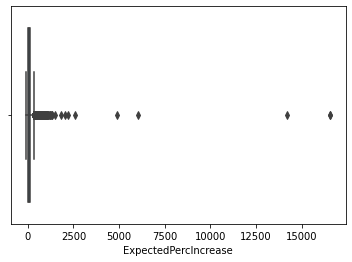

In [312]:
# display statistics for predicted variable
print(df['ExpectedPercIncrease'].describe())

# boxplot skewed to left with many large outliers to the right
sns.boxplot(x=df["ExpectedPercIncrease"])

Losing 24 participants


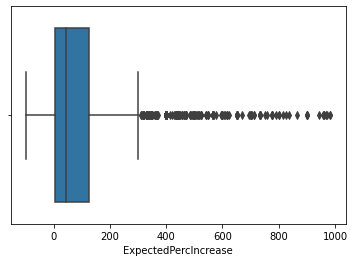

In [313]:
# get rid of most extreme outliers
print("Losing",len(df[df["ExpectedPercIncrease"]>=1000]),"participants")
df = df[df["ExpectedPercIncrease"]<1000]

# new boxplot
sns.boxplot(x=df["ExpectedPercIncrease"])

0.0    596
1.0    560
3.0    544
4.0    522
2.0    488
Name: Age, dtype: int64


[Text(0.5, 0, 'Age group')]

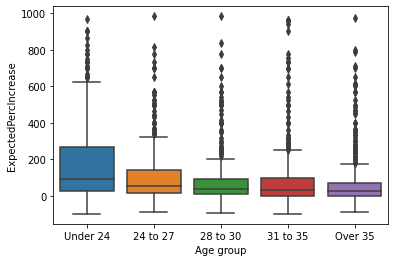

In [314]:
# assign the mean age to those who did not state their age
mean_age = df['Age'].mean()
df['Age'][df['Age'] == 0.0] = int(mean_age)

# group ages into categories
# modified from: https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8
df.loc[df['Age'] <= 24, 'Age'] = 0
df.loc[(df['Age'] > 24) & (df['Age'] <= 27), 'Age'] = 1
df.loc[(df['Age'] > 27) & (df['Age'] <= 30), 'Age'] = 2
df.loc[(df['Age'] > 30) & (df['Age'] <= 35), 'Age'] = 3
df.loc[df['Age'] > 35, 'Age'] = 4

# display proportion of people in each category
print(df['Age'].value_counts(dropna=False))

# convert integer categories to strings for boxplot
options = {"0.0": 'Under 24', "1.0": '24 to 27', "2.0": '28 to 30', "3.0": '31 to 35', "4.0": 'Over 35'}
ages = df['Age'].astype(str).values.tolist()
strings = [options[age] for age in ages]

# display boxplot of expected percentage increase in salary for each age group
# results show that younger age groups have higher and more diverse expectations for salary increases
sns.boxplot(x=strings, y=df['ExpectedPercIncrease']).set(xlabel='Age group')

0.0    2593
1.0     117
Name: AttendedBootcamp, dtype: int64


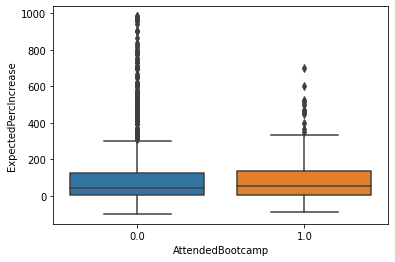

In [315]:
# breakdown of how many people attended bootcamps
print(df['AttendedBootcamp'].value_counts(dropna=False))

# display boxplot of expected percentage increase in salary for bootcamp attendees
sns.boxplot(x=df['AttendedBootcamp'], y=df['ExpectedPercIncrease'])

# very few people attended bootcamp and similar boxplots so feature dropped from DataFrame
df = df.drop(columns=['AttendedBootcamp'])

2.0    1047
1.0     994
0.0     669
Name: CityPopulation, dtype: int64


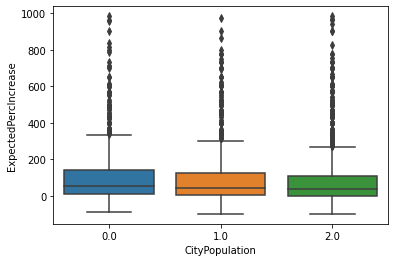

In [316]:
# map city population options to categories in increasing order
pop_options = {"less than 100,000": 0, "between 100,000 and 1 million": 1, "more than 1 million": 2}
df['CityPopulation'] = df['CityPopulation'].map(pop_options)

# replace null values with most popular option
df['CityPopulation'][df['CityPopulation'].isnull()] = 2

# breakdown of city populations
print(df['CityPopulation'].value_counts(dropna=False))

# display boxplot of expected percentage increase in salary for each city population
# similar results, slightly more variation and higher expectations for smaller cities
sns.boxplot(x=df['CityPopulation'], y=df['ExpectedPercIncrease'])

2.0    845
1.0    663
3.0    478
4.0    298
0.0    273
5.0    153
Name: CommuteTime, dtype: int64


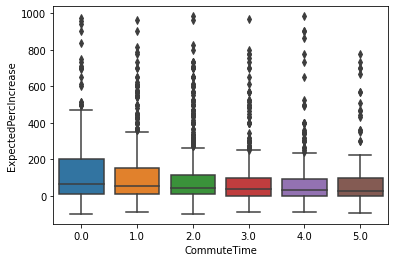

In [317]:
# map commute time options to categories in increasing order
time_options = {"I work from home": 0, "Less than 15 minutes": 1, "15 to 29 minutes": 2, "30 to 44 minutes": 3, "45 to 60 minutes": 4, "More than 60 minutes": 5}
df['CommuteTime'] = df['CommuteTime'].map(time_options)

# replace null values with most popular option
df['CommuteTime'][df['CommuteTime'].isnull()] = 2

# breakdown of commute times
print(df['CommuteTime'].value_counts(dropna=False))

# display boxplot of expected percentage increase in salary for each commute time
# people who work from home/have shorter commutes expect the greatest increases in salary and have the most varied expectations
sns.boxplot(x=df['CommuteTime'], y=df['ExpectedPercIncrease'])

0.0    1605
5.0     773
1.0     142
2.0      97
4.0      47
3.0      46
Name: CountryLive, dtype: int64


[Text(0.5, 0, 'Country')]

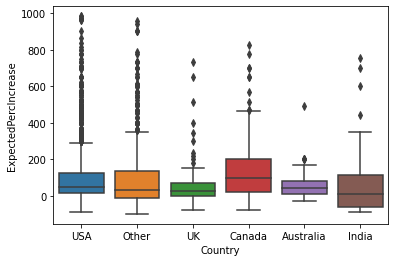

In [318]:
# map country options to categories (only using most popular countries)
country_options = {"United States of America": 0, "United Kingdom": 1, "Canada": 2, "Australia": 3, "India": 4, "Other": 5}
df['CountryLive'] = df['CountryLive'].map(country_options)

# put least popular countries in 'Other' category
df['CountryLive'][df['CountryLive'].isnull()] = 5

# breakdown of countries
print(df['CountryLive'].value_counts(dropna=False))

# convert integer categories to strings for boxplot
options = {"0.0": 'USA', "1.0": 'UK', "2.0": 'Canada', "3.0": 'Australia', "4.0": 'India', "5.0": 'Other'}
countries = df['CountryLive'].astype(str).values.tolist()
strings = [options[country] for country in countries]

# display boxplot of expected percentage increase in salary for each country
# Canada has the greatest expectations for salary increases
# UK and Australia have the least varied expectations
sns.boxplot(x=strings, y=df['ExpectedPercIncrease']).set(xlabel='Country')

9.0    716
0.0    689
1.0    279
2.0    194
4.0    176
3.0    176
5.0    154
6.0    133
7.0    103
8.0     90
Name: EmploymentField, dtype: int64


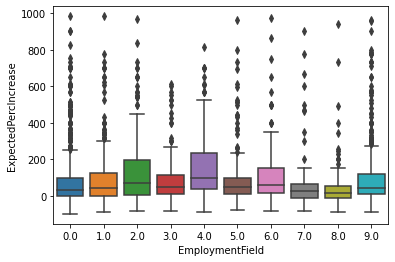

In [319]:
# map employment field options to categories
field_options = {"software development and IT": 0, "education": 1, "sales": 2, "office and administrative support": 3, "food and beverage": 4, 
                 "health care": 5, "arts, entertainment, sports, or media": 6, "finance": 7, "architecture or physical engineering": 8, "other": 9}
df['EmploymentField'] = df['EmploymentField'].map(field_options)

# put least popular fields in 'Other' category
df['EmploymentField'][df['EmploymentField'].isnull()] = 9

# breakdown of fields
print(df['EmploymentField'].value_counts(dropna=False))

# display boxplot of expected percentage increase in salary for each field
# food and beverage workers expect the greatest salary increase
sns.boxplot(x=df['EmploymentField'], y=df['ExpectedPercIncrease'])

In [320]:
# breakdown of employment statuses
print(df['EmploymentStatus'].value_counts(dropna=False))

# distribution too skewed so feature dropped from DataFrame
df = df.drop(columns=['EmploymentStatus'])

Employed for wages              2382
Self-employed freelancer         238
Self-employed business owner      90
Name: EmploymentStatus, dtype: int64


0.0    2066
1.0     585
2.0      59
Name: Gender, dtype: int64


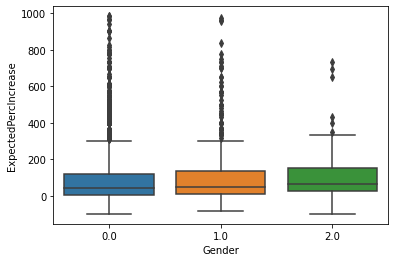

In [321]:
# map gender options to categories (used 'other' category for smallest groups of data)
gender_options = {"male": 0, "female":1, "other":2}
df['Gender'] = df['Gender'].map(gender_options)

# put least popular genders in 'Other' category
df['Gender'][df['Gender'].isnull()] = 2

# breakdown of genders
print(df['Gender'].value_counts(dropna=False))

# display boxplot of expected percentage increase in salary for each gender
# results show comparatively little difference in salary increase expectations between genders
sns.boxplot(x=df['Gender'], y=df['ExpectedPercIncrease'])

0.0    2117
1.0     593
Name: HasChildren, dtype: int64


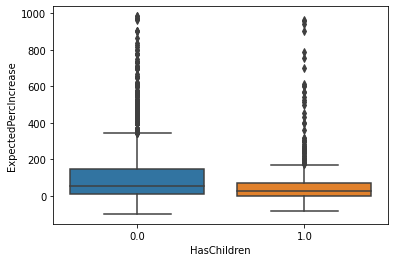

In [322]:
# breakdown of parents
print(df['HasChildren'].value_counts(dropna=False))

# display boxplot of expected percentage increase in salary for people with and without children
# results show parents have less varied and slightly lower expectations, although fewer participants are parents
sns.boxplot(x=df['HasChildren'], y=df['ExpectedPercIncrease'])

1.0    1601
0.0    1109
Name: HasDebt, dtype: int64


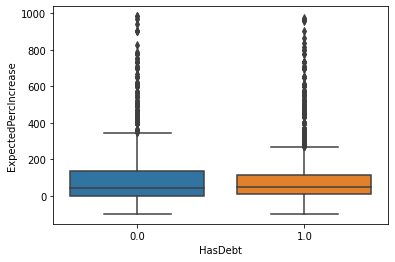

In [323]:
# breakdown of debt
print(df['HasDebt'].value_counts(dropna=False))

# display boxplot of expected percentage increase in salary for people with and without debt
# results show adults with debt have slightly less varied expectations
sns.boxplot(x=df['HasDebt'], y=df['ExpectedPercIncrease'])

0.0    2259
1.0     451
Name: HasHomeMortgage, dtype: int64


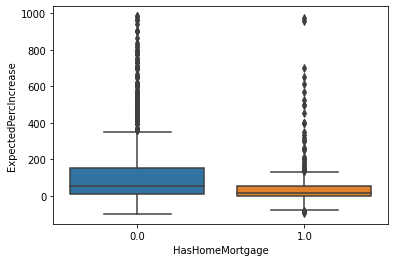

In [324]:
# breakdown of mortgages
print(df['HasHomeMortgage'].value_counts(dropna=False))

# display boxplot of expected percentage increase in salary for people with and without mortgages
# results show adults with mortgages have less varied expectations, although there are fewer adults who have mortgages
sns.boxplot(x=df['HasHomeMortgage'], y=df['ExpectedPercIncrease'])

1.0    774
0.0    681
2.0    461
4.0    400
3.0    394
Name: HoursLearning, dtype: int64


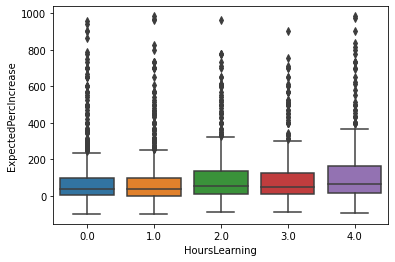

In [325]:
# give those who did not say how many hours they learn per week the mean number
mean_learn = df['HoursLearning'].mean()
df['HoursLearning'][df['HoursLearning'] == 0.0] = int(mean_learn)

# group into categories
df.loc[df['HoursLearning'] <= 5, 'HoursLearning'] = 0
df.loc[(df['HoursLearning'] > 5) & (df['HoursLearning'] <= 10), 'HoursLearning'] = 1
df.loc[(df['HoursLearning'] > 10) & (df['HoursLearning'] <= 15), 'HoursLearning'] = 2
df.loc[(df['HoursLearning'] > 15) & (df['HoursLearning'] <= 20), 'HoursLearning'] = 3
df.loc[df['HoursLearning'] > 20, 'HoursLearning'] = 4

# display proportions of each category
print(df['HoursLearning'].value_counts(dropna=False))

# display boxplot of expected percentage increase in salary for each learning group
# there is a slight increase in median salary expectations as the number of hours of learning per week increases
sns.boxplot(x=df['HoursLearning'], y=df['ExpectedPercIncrease'])

5.0    334
0.0    314
3.0    294
1.0    267
9.0    263
4.0    254
8.0    253
7.0    246
2.0    244
6.0    241
Name: Income, dtype: int64


[Text(0.5, 0, 'Income band')]

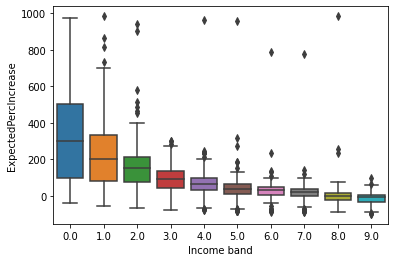

In [326]:
# group into categories
df.loc[df['Income'] <= 10000, 'Income'] = 0
df.loc[(df['Income'] > 10000) & (df['Income'] <= 15000), 'Income'] = 1
df.loc[(df['Income'] > 15000) & (df['Income'] <= 20000), 'Income'] = 2
df.loc[(df['Income'] > 20000) & (df['Income'] <= 28000), 'Income'] = 3
df.loc[(df['Income'] > 28000) & (df['Income'] <= 34000), 'Income'] = 4
df.loc[(df['Income'] > 34000) & (df['Income'] <= 40000), 'Income'] = 5
df.loc[(df['Income'] > 40000) & (df['Income'] <= 49000), 'Income'] = 6
df.loc[(df['Income'] > 49000) & (df['Income'] <= 59000), 'Income'] = 7
df.loc[(df['Income'] > 59000) & (df['Income'] <= 70000), 'Income'] = 8
df.loc[df['Income'] > 70000, 'Income'] = 9

# display proportions of each category
print(df['Income'].value_counts(dropna=False))

# display boxplot of expected percentage increase in salary for each income group
# as the income increases the expected percentage increase in salary decreases and becomes less varied
sns.boxplot(x=df['Income'], y=df['ExpectedPercIncrease']).set(xlabel = 'Income band')

0.0    1955
1.0     755
Name: IsEthnicMinority, dtype: int64


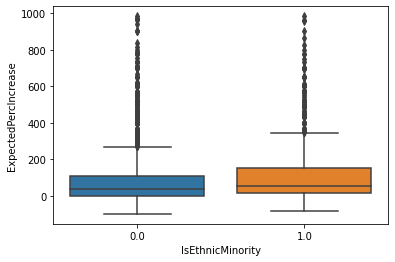

In [327]:
# breakdown of ethnic groups
print(df['IsEthnicMinority'].value_counts(dropna=False))

# display boxplot of expected percentage increase in salary for different ethnic groups
# ethnic minorities have slightly higher expected increases in salary
sns.boxplot(x=df['IsEthnicMinority'], y=df['ExpectedPercIncrease'])

1.0    818
2.0    651
4.0    500
3.0    412
0.0    329
Name: JobApplyWhen, dtype: int64


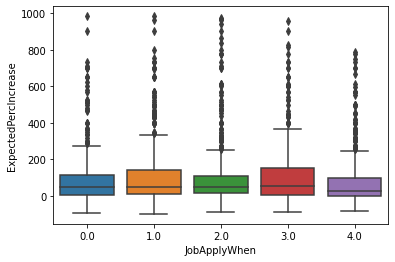

In [328]:
# map application time options to categories (in increasing order)
app_options = {"I'm already applying": 0,"Within the next 6 months": 1, "Within 7 to 12 months": 2, 
               "more than 12 months from now": 3, "I haven't decided": 4}
df['JobApplyWhen'] = df['JobApplyWhen'].map(app_options)

# replace null values with most popular category
df['JobApplyWhen'][df['JobApplyWhen'].isnull()] = 1

# breakdown of application times
print(df['JobApplyWhen'].value_counts(dropna=False))

# display boxplot of expected percentage increase in salary for each application time
# relatively similar results from all categories
sns.boxplot(x=df['JobApplyWhen'], y=df['ExpectedPercIncrease'])

3.0    1150
0.0     707
4.0     425
1.0     318
2.0     110
Name: JobPref, dtype: int64


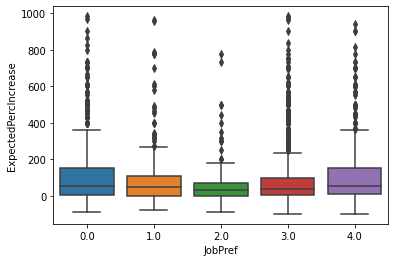

In [329]:
# map job preferences to categories (in increasing size)
job_options = {"work for a startup": 0, "work for a nonprofit": 1, "work for a government": 2,
               "work for a medium-sized company": 3, "work for a multinational corporation": 4}
df['JobPref'] = df['JobPref'].map(job_options)

# replace null values with most popular category
df['JobPref'][df['JobPref'].isnull()] = 3

# breakdown of job preferences
print(df['JobPref'].value_counts(dropna=False))

# display boxplot of expected percentage increase in salary for each job preference
# slightly more varied salary expectations at startups and multinational corporations
sns.boxplot(x=df['JobPref'], y=df['ExpectedPercIncrease'])

2.0    1286
1.0     821
0.0     603
Name: JobWherePref, dtype: int64


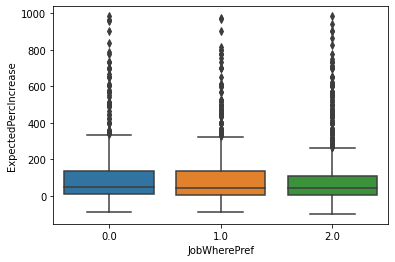

In [330]:
# map job location preferences to categories
loc_options = {"from home": 0, "no preference": 1, "in an office with other developers": 2}
df['JobWherePref'] = df['JobWherePref'].map(loc_options)

# replace null values with most popular category
df['JobWherePref'][df['JobWherePref'].isnull()] = 2

# breakdown of job location preferences
print(df['JobWherePref'].value_counts(dropna=False))

# display boxplot of expected percentage increase in salary for each location preference
# no major differences between groups
sns.boxplot(x=df['JobWherePref'], y=df['ExpectedPercIncrease'])

0.0    1473
1.0    1132
2.0     105
Name: MaritalStatus, dtype: int64


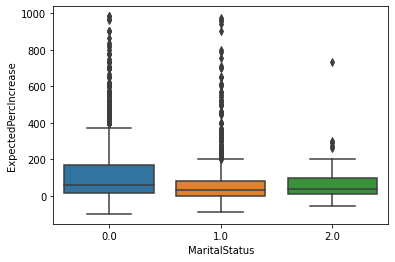

In [331]:
# map marital status to categories
marital_options = {"single, never married": 0, "married or domestic partnership": 1, "other": 2}
df['MaritalStatus'] = df['MaritalStatus'].map(marital_options)

# put smallest groups in 'other' category
df['MaritalStatus'][df['MaritalStatus'].isnull()] = 2

# breakdown of relationship statuses
print(df['MaritalStatus'].value_counts(dropna=False))

# display boxplot of expected percentage increase in salary for each relationship status
# single people have more varied salary expections
sns.boxplot(x=df['MaritalStatus'], y=df['ExpectedPercIncrease'])

0.0    1204
3.0     454
4.0     404
2.0     341
1.0     307
Name: MoneyForLearning, dtype: int64


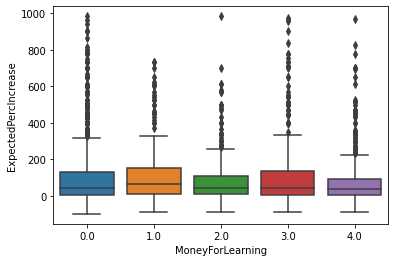

In [332]:
# group into categories
df.loc[df['MoneyForLearning'] <= 0, 'MoneyForLearning'] = 0
df.loc[(df['MoneyForLearning'] > 0) & (df['MoneyForLearning'] <= 50), 'MoneyForLearning'] = 1
df.loc[(df['MoneyForLearning'] > 50) & (df['MoneyForLearning'] <= 150), 'MoneyForLearning'] = 2
df.loc[(df['MoneyForLearning'] > 150) & (df['MoneyForLearning'] <= 500), 'MoneyForLearning'] = 3
df.loc[df['MoneyForLearning'] > 500, 'MoneyForLearning'] = 4

# display proportions of each category
print(df['MoneyForLearning'].value_counts(dropna=False))

# display boxplot of expected percentage increase in salary for each spending group
# similar results for all categories
sns.boxplot(x=df['MoneyForLearning'], y=df['ExpectedPercIncrease'])

2.0    587
1.0    558
4.0    532
0.0    521
3.0    512
Name: MonthsProgramming, dtype: int64


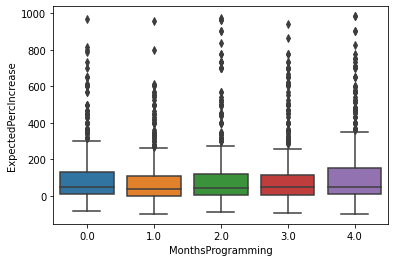

In [333]:
# group into categories
df.loc[df['MonthsProgramming'] <= 1, 'MonthsProgramming'] = 0
df.loc[(df['MonthsProgramming'] > 1) & (df['MonthsProgramming'] <= 3), 'MonthsProgramming'] = 1
df.loc[(df['MonthsProgramming'] > 3) & (df['MonthsProgramming'] <= 7), 'MonthsProgramming'] = 2
df.loc[(df['MonthsProgramming'] > 7) & (df['MonthsProgramming'] <= 16), 'MonthsProgramming'] = 3
df.loc[df['MonthsProgramming'] > 16, 'MonthsProgramming'] = 4

# display proportions of each category
print(df['MonthsProgramming'].value_counts(dropna=False))

# display boxplot of expected percentage increase in salary for each programming group
# similar results for each group
sns.boxplot(x=df['MonthsProgramming'], y=df['ExpectedPercIncrease'])

5.0    1121
3.0     540
6.0     310
1.0     221
4.0     162
7.0     138
2.0      98
0.0      83
8.0      37
Name: SchoolDegree, dtype: int64


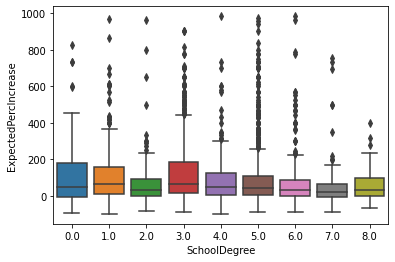

In [334]:
# map degrees to categories (in increasing level of education)
deg_options = {"other": 0, "high school diploma or equivalent (GED)": 1, "trade, technical, or vocational training": 2,
               "some college credit, no degree": 3, "associate's degree": 4, "bachelor's degree": 5,
               "master's degree (non-professional)": 6, "professional degree (MBA, MD, JD, etc.)": 7, "Ph.D.":8}
df['SchoolDegree'] = df['SchoolDegree'].map(deg_options)

# put least popular categories into 'other'
df['SchoolDegree'][df['SchoolDegree'].isnull()] = 0

# breakdown of degrees
print(df['SchoolDegree'].value_counts(dropna=False))

# display boxplot of expected percentage increase in salary for each degree
# variations for different categories
sns.boxplot(x=df['SchoolDegree'], y=df['ExpectedPercIncrease'])

In [335]:
# breakdown of subjects studied
print(df['SchoolMajor'].value_counts(dropna=False))

# too few in each category and too many null values so feature dropped
df = df.drop(columns=['SchoolMajor'])

0                                             956
Computer Science                              121
Business Administration                        57
Information Technology                         49
Psychology                                     48
                                             ... 
Pharmacy                                        1
Environmental Architecture and Design           1
Social Work and Youth Services                  1
Construction and Heavy Equipment Operation      1
Legal Studies                                   1
Name: SchoolMajor, Length: 308, dtype: int64


0.0    1639
1.0     700
2.0     209
3.0     162
Name: CodeEvents, dtype: int64


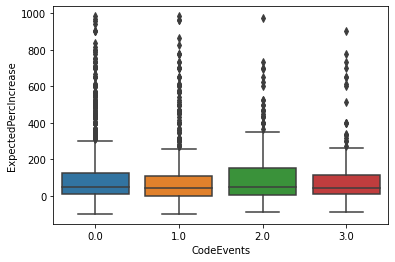

In [336]:
# group smallest categories together
df['CodeEvents'][df['CodeEvents'] >= 3 ] = 3

# breakdown of code events attended
print(df['CodeEvents'].value_counts(dropna=False))

# display boxplot of expected percentage increase in salary for each number of events attended
# only slight variations between groups
sns.boxplot(x=df['CodeEvents'], y=df['ExpectedPercIncrease'])

0.0    1742
1.0     623
3.0     185
2.0     160
Name: Podcasts, dtype: int64


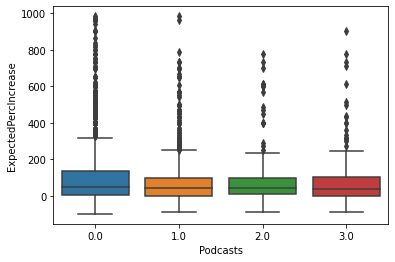

In [337]:
# group smallest categories together
df['Podcasts'][df['Podcasts'] >= 3 ] = 3

# breakdown of podcasts listened to
print(df['Podcasts'].value_counts(dropna=False))

# display boxplot of expected percentage increase in salary for each number of podcasts
# only slight variations between groups
sns.boxplot(x=df['Podcasts'], y=df['ExpectedPercIncrease'])

5.0     440
4.0     407
6.0     340
3.0     338
7.0     264
2.0     259
1.0     215
8.0     186
10.0    149
9.0     112
Name: Resources, dtype: int64


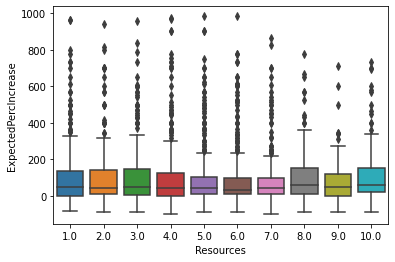

In [338]:
# group smallest categories together
df['Resources'][df['Resources'] <= 1 ] = 1
df['Resources'][df['Resources'] >= 10 ] = 10

# breakdown of helpful resources accessed
print(df['Resources'].value_counts(dropna=False))

# display boxplot of expected percentage increase in salary for each number of resources
# only slight variations between groups
sns.boxplot(x=df['Resources'], y=df['ExpectedPercIncrease'])

0.0    793
1.0    775
2.0    419
3.0    306
4.0    180
6.0    129
5.0    108
Name: Videos, dtype: int64


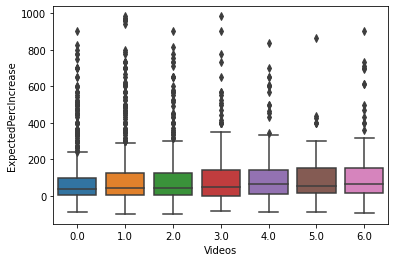

In [339]:
# group smallest categories together
df['Videos'][df['Videos'] >= 6 ] = 6

# breakdown of helpful youtube channels accessed
print(df['Videos'].value_counts(dropna=False))

# display boxplot of expected percentage increase in salary for each number of youtube channels
# slight increase in expectations with more videos watched
sns.boxplot(x=df['Videos'], y=df['ExpectedPercIncrease'])

In [340]:
# keep copy of data at this point
transformed_df = df.copy()

# look at transformed data
display (df.head())

,Age,CityPopulation,CommuteTime,CountryLive,EmploymentField,ExpectedEarning,Gender,HasChildren,HasDebt,HasHomeMortgage,HoursLearning,Income,IsEthnicMinority,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobWherePref,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,ExpectedPercIncrease,CodeEvents,Podcasts,Resources,Videos
2,0.0,2.0,2.0,0.0,0.0,70000.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,4.0,2.0,1.0,438.46,2.0,3.0,6.0,5.0
3,1.0,1.0,0.0,5.0,0.0,40000.0,0.0,0.0,1.0,1.0,2.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,2.0,3.0,66.67,0.0,0.0,4.0,4.0
6,2.0,1.0,3.0,1.0,9.0,30000.0,1.0,0.0,1.0,1.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,3.0,3.0,-25.00,3.0,0.0,6.0,0.0
15,3.0,0.0,3.0,0.0,2.0,40000.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,6.0,100.00,0.0,1.0,2.0,0.0
16,2.0,1.0,3.0,0.0,7.0,60000.0,0.0,0.0,0.0,0.0,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,3.0,3.0,6.0,0.00,1.0,3.0,6.0,3.0


### Feature correlations

In [341]:
# split features into personal characteristics, career preferences, learner information

char_labels = ["SchoolDegree","CommuteTime","IsEthnicMinority","Income","MaritalStatus","EmploymentField","CountryLive",
               "HasDebt","Age","CityPopulation","HasChildren","Gender","HasHomeMortgage"]

pref_labels = ["JobInterestProjMngr","JobPref","JobInterestUX","JobWherePref","JobInterestMobile","JobInterestDataEngr",
               "JobApplyWhen","JobInterestBackEnd","JobInterestDevOps","JobInterestFrontEnd","JobInterestDataSci",
               "JobInterestGameDev","JobInterestQAEngr","JobInterestFullStack","JobInterestInfoSec"]
               
learn_labels = ["Resources","Videos","MonthsProgramming","Podcasts","HoursLearning","MoneyForLearning","CodeEvents"]

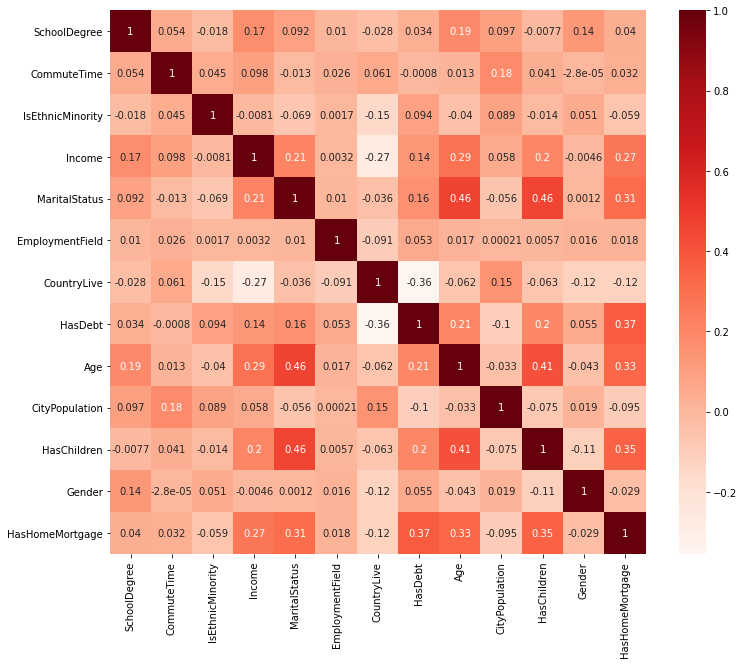

In [342]:
# plot heatmap of Pearson correlations between personal characteristics
# code adapted from: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
plt.figure(figsize=(12,10))
char_df = df[char_labels]
cor = char_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# results show that marital status, age and having children are related
# they will be aggregated into one new feature: HasFamily

# adding column for new aggregated feature
# code for adding column adapted from: https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o
def add_family(row):
  if row['MaritalStatus'] == 1 or row['HasChildren'] == 1:
    return 1
  else:
    return 0

df['HasFamily'] = df.apply(lambda row: add_family(row), axis=1)

# drop columns used for aggregation
df = df.drop(columns=["MaritalStatus","Age","HasChildren"])

# update labels
char_labels.append("HasFamily")
char_labels.remove("MaritalStatus")
char_labels.remove("Age")
char_labels.remove("HasChildren")

# results show that having debt and a mortgage are related
# they will be aggregated into one new feature: AnyDebt

# adding column for new aggregated feature
def add_debt(row):
  if row['HasDebt'] == 1 or row['HasHomeMortgage'] == 1:
    return 1
  else:
    return 0

df['AnyDebt'] = df.apply(lambda row: add_debt(row), axis=1)

# drop columns used for aggregation
df = df.drop(columns=["HasDebt","HasHomeMortgage"])

# update labels
char_labels.append("AnyDebt")
char_labels.remove("HasDebt")
char_labels.remove("HasHomeMortgage")

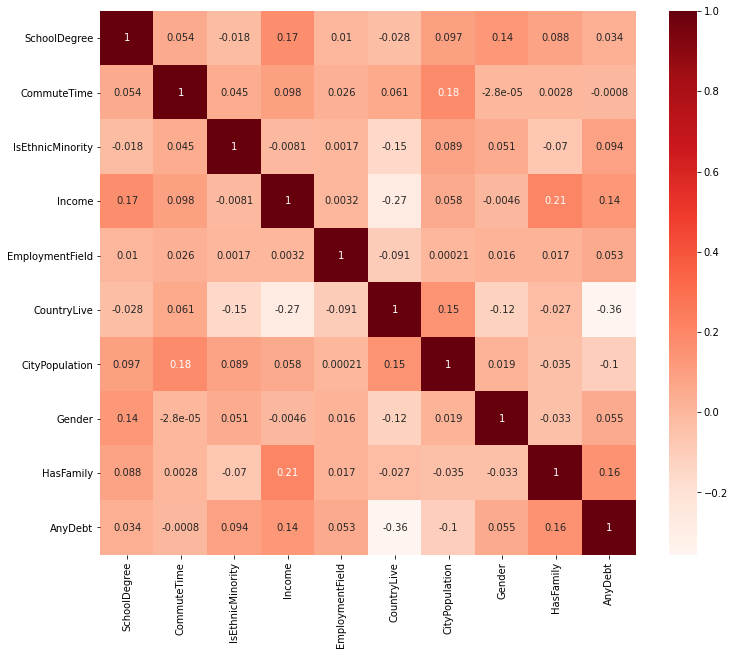

In [343]:
# plot heatmap with new features
plt.figure(figsize=(12,10))
char_df = df[char_labels]
cor = char_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

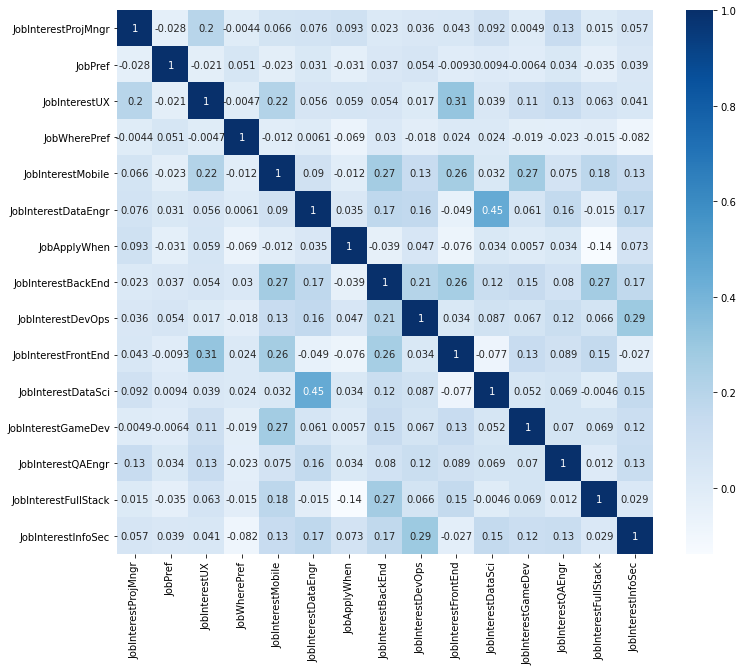

In [344]:
# plot heatmap of Pearson correlations between career preferences
plt.figure(figsize=(12,10))
pref_df = df[pref_labels]
cor = pref_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

# results show that having an interest in Data Science and Data Engineering are related
# they will be aggregated into one new feature: JobInterestData

# adding column for new aggregated feature
def add_data(row):
  if row['JobInterestDataEngr'] == 1 or row['JobInterestDataSci'] == 1:
    return 1
  else:
    return 0

df['JobInterestData'] = df.apply(lambda row: add_data(row), axis=1)

# drop columns used for aggregation
df = df.drop(columns=["JobInterestDataEngr","JobInterestDataSci"])

# update labels
pref_labels.append("JobInterestData")
pref_labels.remove("JobInterestDataEngr")
pref_labels.remove("JobInterestDataSci")

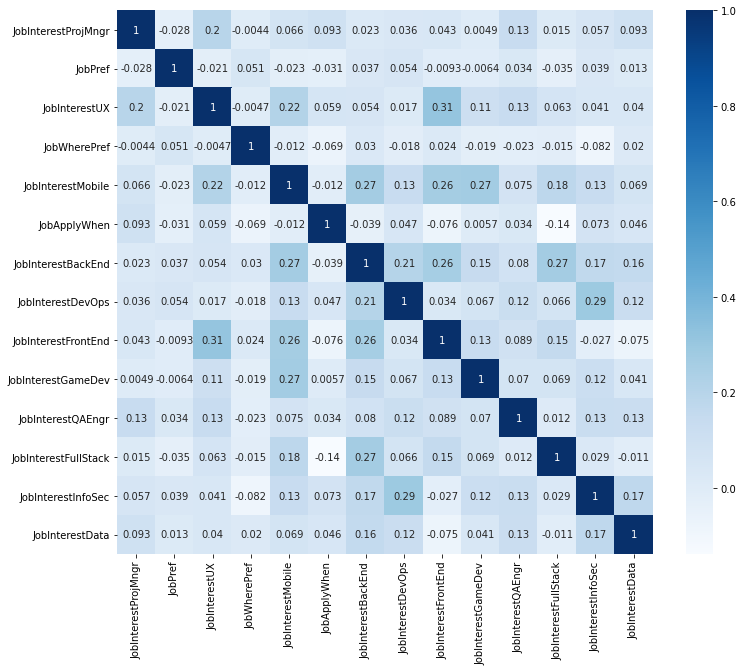

In [345]:
# plot heatmap with new feature
plt.figure(figsize=(12,10))
pref_df = df[pref_labels]
cor = pref_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

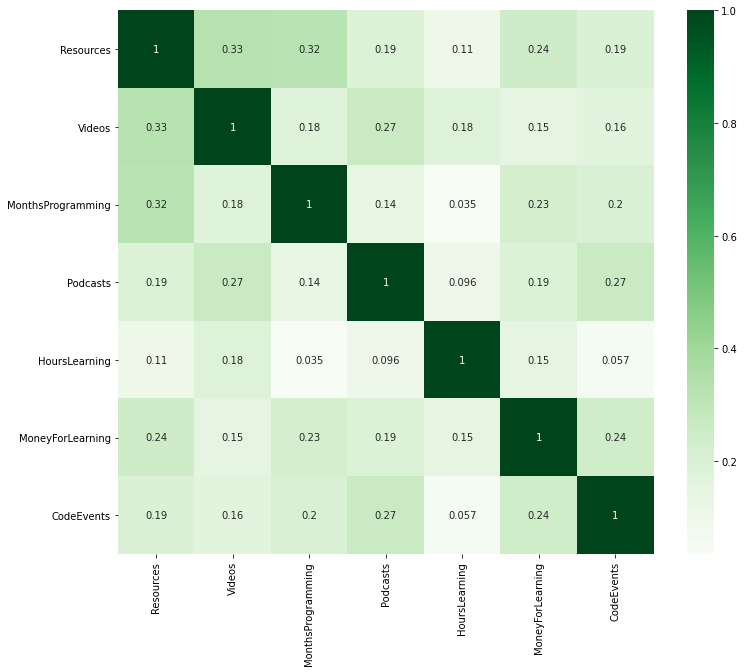

In [346]:
# plot heatmap of Pearson correlations between learning styles
plt.figure(figsize=(12,10))
learn_df = df[learn_labels]
cor = learn_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Greens)
plt.show()

# no significant correlations so no variables aggregated

In [347]:
# look at transformed data
display (df.head())

,CityPopulation,CommuteTime,CountryLive,EmploymentField,ExpectedEarning,Gender,HoursLearning,Income,IsEthnicMinority,JobApplyWhen,JobInterestBackEnd,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobWherePref,MoneyForLearning,MonthsProgramming,SchoolDegree,ExpectedPercIncrease,CodeEvents,Podcasts,Resources,Videos,HasFamily,AnyDebt,JobInterestData
2,2.0,2.0,0.0,0.0,70000.0,0.0,4.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,4.0,2.0,1.0,438.46,2.0,3.0,6.0,5.0,0,0,0
3,1.0,0.0,5.0,0.0,40000.0,0.0,2.0,3.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,3.0,66.67,0.0,0.0,4.0,4.0,1,1,0
6,1.0,3.0,1.0,9.0,30000.0,1.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,3.0,3.0,-25.00,3.0,0.0,6.0,0.0,1,1,0
15,0.0,3.0,0.0,2.0,40000.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,6.0,100.00,0.0,1.0,2.0,0.0,0,1,0
16,1.0,3.0,0.0,7.0,60000.0,0.0,1.0,8.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,3.0,3.0,6.0,0.00,1.0,3.0,6.0,3.0,1,0,0


## Create train-test split

In [348]:
# split into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2)

# get lengths of each set
print("Number of training examples:",len(train_df))
print("Number of test examples:",len(test_df))

# split into features and labels
x_train = train_df.drop(columns=["ExpectedPercIncrease","ExpectedEarning"])
y_train = train_df['ExpectedPercIncrease']
x_test = test_df.drop(columns=["ExpectedPercIncrease","ExpectedEarning"])
y_test = test_df['ExpectedPercIncrease']

Number of training examples: 2168
Number of test examples: 542


## Regression

In [349]:
# store scores to find best regressor
r2_scores = []
crossval_r2_scores = []
mae_scores = []
crossval_mae_scores = []
rmse_scores = []
crossval_rmse_scores = []

In [350]:
# display scores for each regressor on test set
def run_regressor(reg):

  # get predictions for test set
  y_pred = reg.predict(x_test)

  # get r^2 score of regressor on test set
  r2_score = reg.score(x_test,y_test)
  r2_scores.append(round(r2_score,2))
  print("R^2 score:",round(r2_score,2))

  # run 5-fold cross-validation for r^2 metric
  cv_r2_scores = cross_val_score(reg, x_train, y_train, scoring='r2')
  print("5-fold cross-validation R^2 score: ",round(cv_r2_scores.mean(),2),"\n")
  crossval_r2_scores.append(round(cv_r2_scores.mean(),2))

  # get mean absolute error of regressor on test set
  mae_score = mean_absolute_error(y_test,y_pred)
  mae_scores.append(round(mae_score,2))
  print("Mean Absolute Error:",round(mae_score,2))

  # run 5-fold cross-validation for mae metric
  cv_mae_scores = cross_val_score(reg, x_train, y_train, scoring='neg_mean_absolute_error')
  print("5-fold cross-validation MAE score: ",round(-cv_mae_scores.mean(),2),"\n")
  crossval_mae_scores.append(round(-cv_mae_scores.mean(),2))

  # get root mean squared error of regressor on test set
  rmse_score = mean_squared_error(y_test,y_pred,squared=False)
  rmse_scores.append(round(rmse_score,2))
  print("Root Mean Squared Error:",round(rmse_score,2))

  # run 5-fold cross-validation for rmse metric
  cv_rmse_scores = cross_val_score(reg, x_train, y_train, scoring='neg_root_mean_squared_error')
  print("5-fold cross-validation RMSE score: ",round(-cv_rmse_scores.mean(),2),"\n")
  crossval_rmse_scores.append(round(-cv_rmse_scores.mean(),2))

  # display scatter plot of scores
  plt.scatter(y_test, y_pred)
  plt.xlabel("True expected percentage increase in income")
  plt.ylabel("Predicted expected increase in income")
  # don't show extreme outliers
  plt.xlim([-300, 1000])
  plt.ylim([-300, 1000])
  plt.show()

Linear Regression
R^2 score: 0.48
5-fold cross-validation R^2 score:  0.4 

Mean Absolute Error: 79.15
5-fold cross-validation MAE score:  82.08 

Root Mean Squared Error: 119.97
5-fold cross-validation RMSE score:  126.85 



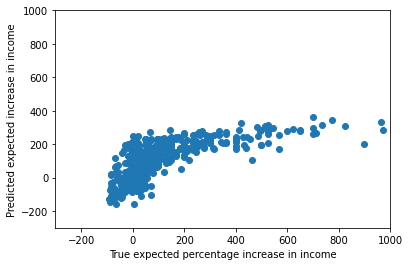

Random Forest
R^2 score: 0.59
5-fold cross-validation R^2 score:  0.47 

Mean Absolute Error: 67.54
5-fold cross-validation MAE score:  70.6 

Root Mean Squared Error: 106.55
5-fold cross-validation RMSE score:  118.51 



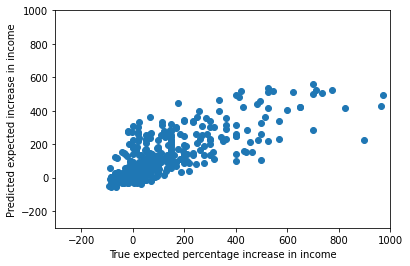

Gradient Boosting
R^2 score: 0.63
5-fold cross-validation R^2 score:  0.49 

Mean Absolute Error: 63.09
5-fold cross-validation MAE score:  68.33 

Root Mean Squared Error: 101.79
5-fold cross-validation RMSE score:  116.11 



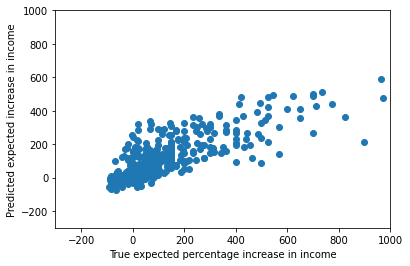

AdaBoost
R^2 score: 0.44
5-fold cross-validation R^2 score:  0.37 

Mean Absolute Error: 88.27
5-fold cross-validation MAE score:  86.03 

Root Mean Squared Error: 125.16
5-fold cross-validation RMSE score:  129.31 



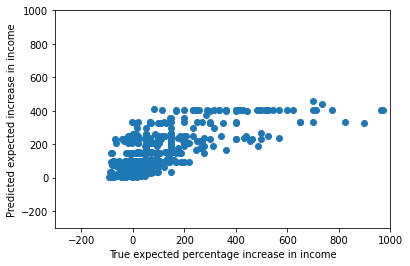

In [351]:
# regressors (random state for reproducibility)

# linear regression
print("Linear Regression")
reg = LinearRegression().fit(x_train, y_train)
run_regressor(reg)

# random forest regression
print("Random Forest")
reg = RandomForestRegressor(random_state=0).fit(x_train, y_train)
run_regressor(reg)

# gradient boosting for regression
print("Gradient Boosting")
reg = GradientBoostingRegressor(random_state=0).fit(x_train, y_train)
run_regressor(reg)

# AdaBoost regression
print("AdaBoost")
reg = AdaBoostRegressor(random_state=0, n_estimators=100).fit(x_train, y_train)
run_regressor(reg)

In [352]:
# compare results of regressors (on test set and cross-validation scores)
regressors = ["Linear", "Random Forest", "Gradient Boosting", "AdaBoost"]
regs = pd.DataFrame({'regressor':regressors,"r2":r2_scores,"mae":mae_scores,"rmse":rmse_scores,
                          "cv r2":crossval_r2_scores,"cv mae":crossval_mae_scores,"cv rmse":crossval_rmse_scores})

# calculate ranking for each metric
regs['r2 rank'] = regs['r2'].rank(method='max')
regs['mae rank'] = regs['mae'].rank(method='min')
regs['rmse rank'] = regs['rmse'].rank(method='min')
regs['cv r2 rank'] = regs['cv r2'].rank(method='max')
regs['cv mae rank'] = regs['cv mae'].rank(method='min')
regs['cv rmse rank'] = regs['cv rmse'].rank(method='min')

# create overall ranking
regs['total rank'] = regs[['r2 rank','mae rank','rmse rank','cv r2 rank','cv mae rank','cv rmse rank']].sum(axis=1)
regs['ranking'] = regs['total rank'].rank(method='min')

# remove unnecessary columns
regs = regs.drop(columns=['r2 rank','mae rank','rmse rank','cv r2 rank','cv mae rank','cv rmse rank','total rank'])

# report rankings
print("Regressor scores on test set and using cross-validation")
display (regs)

# results show that gradient boosting is the best method

Regressor scores on test set and using cross-validation


,regressor,r2,mae,rmse,cv r2,cv mae,cv rmse,ranking
0,Linear,0.48,79.15,119.97,0.40,82.08,126.85,3.0
1,Random Forest,0.59,67.54,106.55,0.47,70.60,118.51,2.0
2,Gradient Boosting,0.63,63.09,101.79,0.49,68.33,116.11,1.0
3,AdaBoost,0.44,88.27,125.16,0.37,86.03,129.31,4.0


### Find most important features

In [353]:
# using best regression method (gradient boosting)
reg = GradientBoostingRegressor(random_state=0).fit(x_train, y_train)

# estimating feature importances using regressor
# code adapted from: https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(reg.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

# adding column for feature labels
def add_label(row):
  if row['feature'] in char_labels:
    return 'characteristics'
  elif row['feature'] in pref_labels:
    return 'career preferences'
  else:
    return 'learning style'

importances['label'] = importances.apply(lambda row: add_label(row), axis=1)

# display most important features
display (importances.head(10))

# display importances and categories on bar chart
fig = go.Figure()

# associating bars with feature categories and colours to see which feature category is most important
fig.add_trace(go.Bar(name="personal characteristics", x=importances['feature'][importances['label']=='characteristics'], 
                     y=importances['importance'][importances['label']=='characteristics'],marker_color='indianred'))

fig.add_trace(go.Bar(name="career preferences", x=importances['feature'][importances['label']=='career preferences'], 
                     y=importances['importance'][importances['label']=='career preferences'],marker_color='blue'))

fig.add_trace(go.Bar(name="learning style", x=importances['feature'][importances['label']=='learning style'], 
                     y=importances['importance'][importances['label']=='learning style'],marker_color='green'))
    
# configure bar chart
fig.update_layout(
    xaxis_title="Feature",
    yaxis_title="Importance",
    width=1500,
    height=500
)
fig.update_xaxes(categoryorder='total descending')

fig.show()

,feature,importance,label
6,Income,0.708,characteristics
2,CountryLive,0.130,characteristics
23,SchoolDegree,0.012,characteristics
8,JobApplyWhen,0.012,career preferences
22,MonthsProgramming,0.012,learning style
26,Resources,0.012,learning style
1,CommuteTime,0.011,characteristics
20,JobWherePref,0.010,career preferences
28,HasFamily,0.010,characteristics
19,JobPref,0.008,career preferences


### Remove least important features

In [354]:
# extract least important features
least_important = importances['feature'][importances['importance'] < 0.01]

# remove from DataFrame
df = df.drop(columns = least_important)

### Retrain best model using most important features

In [355]:
# split into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2)

# split into features and labels
x_train = train_df.drop(columns=["ExpectedPercIncrease","ExpectedEarning"])
y_train = train_df['ExpectedPercIncrease']
x_test = test_df.drop(columns=["ExpectedPercIncrease","ExpectedEarning"])
y_test = test_df['ExpectedPercIncrease']

Gradient Boosting
R^2 score: 0.5
5-fold cross-validation R^2 score:  0.55 

Mean Absolute Error: 59.93
5-fold cross-validation MAE score:  67.95 

Root Mean Squared Error: 108.07
5-fold cross-validation RMSE score:  111.99 



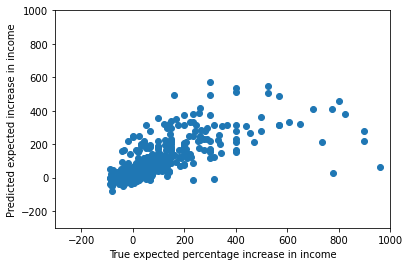

In [356]:
# gradient boosting for regression
print("Gradient Boosting")
reg = GradientBoostingRegressor(random_state=0).fit(x_train, y_train)
run_regressor(reg)

In [357]:
# compare old and new regressor performance

# get old gradient boosting performance
boost = regs[regs['regressor'] == "Gradient Boosting"]
boost = boost.drop(columns=['ranking'])

# get performance of new gradient boosting 
new_reg = pd.DataFrame({'regressor':['Updated Gradient Boosting'],"r2":[r2_scores[-1]],"mae":[mae_scores[-1]],"rmse":[rmse_scores[-1]],
                        "cv r2":[crossval_r2_scores[-1]],"cv mae":[crossval_mae_scores[-1]],"cv rmse":[crossval_rmse_scores[-1]]})

# create DataFrame with both
boost = boost.append(new_reg)

# calculate ranking for each metric
boost['r2 rank'] = boost['r2'].rank(method='max')
boost['mae rank'] = boost['mae'].rank(method='min')
boost['rmse rank'] = boost['rmse'].rank(method='min')
boost['cv r2 rank'] = boost['cv r2'].rank(method='max')
boost['cv mae rank'] = boost['cv mae'].rank(method='min')
boost['cv rmse rank'] = boost['cv rmse'].rank(method='min')

# create overall ranking
boost['total rank'] = boost[['r2 rank','mae rank','rmse rank','cv r2 rank','cv mae rank','cv rmse rank']].sum(axis=1)
boost['ranking'] = boost['total rank'].rank(method='min')

# remove unnecessary columns
boost = boost.drop(columns=['r2 rank','mae rank','rmse rank','cv r2 rank','cv mae rank','cv rmse rank','total rank'])

# display comparison
display (boost)

# results vary between runs but generally similar performance between both models

,regressor,r2,mae,rmse,cv r2,cv mae,cv rmse,ranking
2,Gradient Boosting,0.63,63.09,101.79,0.49,68.33,116.11,2.0
0,Updated Gradient Boosting,0.50,59.93,108.07,0.55,67.95,111.99,1.0


### Correlation between features and predicted variable


In [358]:
# calculate correlation between ACTUAL ExpectedPercIncrease and features
cor = df.drop(columns=["ExpectedEarning"]).corr()
cor = cor.sort_values('ExpectedPercIncrease',ascending=False)
display (cor['ExpectedPercIncrease'])

# display most strongly correlated features
positives = np.array(cor[1:4].index)
print ("\nFeatures most positively correlated with actual ExpectedPercIncrease:")
for label in positives:
  print(label)

negatives = np.array(cor[-3:].index)
negatives = np.flip(negatives)
print ("\nFeatures most negatively correlated with actual ExpectedPercIncrease:")
for label in negatives:
  print(label)

# results vary between runs but generally:
# those who have spent more months programming, those with lower incomes, less education and shorter commutes
# expected greater salary increases

ExpectedPercIncrease    1.000000
MonthsProgramming       0.051864
JobApplyWhen           -0.023084
Resources              -0.023663
CountryLive            -0.030718
JobWherePref           -0.041637
CommuteTime            -0.091138
SchoolDegree           -0.110563
HasFamily              -0.164958
Income                 -0.602149
Name: ExpectedPercIncrease, dtype: float64


Features most positively correlated with actual ExpectedPercIncrease:
MonthsProgramming
JobApplyWhen
Resources

Features most negatively correlated with actual ExpectedPercIncrease:
Income
HasFamily
SchoolDegree


In [359]:
# add column of predicted ExpectedPercIncrease to test DataFrame
test_df['PredictedPercIncrease'] = reg.predict(x_test)

# look at test data
display (test_df.head())

,CommuteTime,CountryLive,ExpectedEarning,Income,JobApplyWhen,JobWherePref,MonthsProgramming,SchoolDegree,ExpectedPercIncrease,Resources,HasFamily,PredictedPercIncrease
2600,1.0,0.0,50000.0,3.0,2.0,1.0,3.0,3.0,100.00,8.0,0,126.224587
421,1.0,2.0,30000.0,0.0,1.0,2.0,1.0,1.0,200.00,8.0,1,201.969582
226,2.0,0.0,35000.0,5.0,2.0,0.0,2.0,5.0,0.00,6.0,0,50.238695
16838,0.0,0.0,40000.0,0.0,4.0,0.0,0.0,5.0,300.00,3.0,1,569.822770
9264,3.0,5.0,7200.0,0.0,2.0,2.0,0.0,3.0,2.86,2.0,0,251.493076


In [360]:
# calculate correlation between PREDICTED ExpectedPercIncrease and features
cor = test_df.drop(columns=["ExpectedEarning","ExpectedPercIncrease"]).corr()
cor = cor.sort_values('PredictedPercIncrease',ascending=False)
display (cor['PredictedPercIncrease'])

# display most strongly correlated features
positives = np.array(cor[1:4].index)
print ("\nFeatures most positively correlated with PredictedPercIncrease:")
for label in positives:
  print(label)

negatives = np.array(cor[-3:].index)
negatives = np.flip(negatives)
print ("\nFeatures most negatively correlated with PredictedPercIncrease:")
for label in negatives:
  print(label)

# results vary between runs but generally
# ranking is roughly the same as actual ExpectedPercIncrease but some correlations are stronger

PredictedPercIncrease    1.000000
CountryLive              0.023314
MonthsProgramming       -0.021352
JobWherePref            -0.033126
JobApplyWhen            -0.039988
Resources               -0.046351
CommuteTime             -0.128491
SchoolDegree            -0.171298
HasFamily               -0.210567
Income                  -0.809176
Name: PredictedPercIncrease, dtype: float64


Features most positively correlated with PredictedPercIncrease:
CountryLive
MonthsProgramming
JobWherePref

Features most negatively correlated with PredictedPercIncrease:
Income
HasFamily
SchoolDegree


## Prescriptive Analytics

In [361]:
# select a random person from the test set
person = test_df.sample(n=1)

# show test features of person
display (person)

# access and display more complete information on person
index = person.index.tolist()[0]
person_info = pd.DataFrame(original_df.loc[index]).transpose()
display (person_info)

# return current income
current_income = int(np.array(person_info['Income'])[0])
print("\nCurrent income:", current_income)

# calculate predicted expected income
pred_perc = (np.array(person['PredictedPercIncrease'])[0]+100)/100
pred_income = int(round(current_income*pred_perc,0))
print("\nPredicted expected income:", pred_income)

# return actual expected income
actual_expected = int(np.array(person['ExpectedEarning'])[0])
print("\nActual expected income:", actual_expected)

# defining the acceptable upper and lower bounds for predicted income
acceptable_distance = 0.1
min_bound = int(round(pred_income-pred_income*acceptable_distance,0))
max_bound = int(round(pred_income+pred_income*acceptable_distance,0))

# reporting how realistic actual expected income is compared to predicted
if actual_expected<min_bound:
  print("\nYour results suggest your expectations are below where they should be. \nAim for higher paid jobs.")
elif actual_expected<=max_bound:
  print("\nYour results suggest your expectations are roughly where they should be.")
else:
  print("\nYour results suggest your expectations are higher than they should be.\nYou should either get more experience or lower your expectations.")

,CommuteTime,CountryLive,ExpectedEarning,Income,JobApplyWhen,JobWherePref,MonthsProgramming,SchoolDegree,ExpectedPercIncrease,Resources,HasFamily,PredictedPercIncrease
4836,1.0,0.0,50000.0,6.0,1.0,2.0,0.0,3.0,11.11,2.0,0,35.9532


,Age,AttendedBootcamp,CityPopulation,CommuteTime,CountryLive,EmploymentField,EmploymentStatus,ExpectedEarning,Gender,HasChildren,HasDebt,HasHomeMortgage,HoursLearning,Income,IsEthnicMinority,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobWherePref,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,ExpectedPercIncrease,CodeEvents,Podcasts,Resources,Videos
4836,28,0,"less than 100,000",Less than 15 minutes,United States of America,transportation,Employed for wages,50000,male,0,1,0,5,45000,0,Within the next 6 months,0,0,0,0,0,0,1,1,0,0,1,0,work for a government,in an office with other developers,"single, never married",0,1,"some college credit, no degree",0,11.11,0,0,2,0



Current income: 45000

Predicted expected income: 61179

Actual expected income: 50000

Your results suggest your expectations are below where they should be. 
Aim for higher paid jobs.


In [362]:
# get age group corresponding to person
age = int(np.array(person_info['Age'])[0])
category = 0
group = "Under 24"
if age > 24 and age <= 27:
  category = 1
  group = "25 to 27"
elif age > 27 and age <= 30:
  category = 2
  group = "28 to 30"
elif age > 30 and age <= 35:
  category = 3
  group = "31 to 35"
elif age > 35:
  category = 4
  group = "Over 35"

# find median salary of age group
age_df = transformed_df[transformed_df['Age'] == category]
age_salary = int(age_df.median()['ExpectedEarning'])

# compare predicted salary to median salary of age group
print("Median expected salary for age group", group,":", age_salary)
if age_salary<min_bound:
  print("\nYour predicted salary is high for your age group.")
elif age_salary<=max_bound:
  print("\nYour predicted salary is roughly average for your age group.")
else:
  print("\nYour predicted salary is low for your age group.")

Median expected salary for age group 28 to 30 : 55000

Your predicted salary is high for your age group.


In [363]:
# get gender corresponding to person
gender = np.array(person_info['Gender'])[0]
if gender == "male":
  category = 0
  group = "men"
elif gender == "female":
  category = 1
  group = "women"
else:
  category = 2
  group = "trans/non-binary/genderqueer people /those who did not give gender"

# find median salary of gender
gender_df = transformed_df[transformed_df['Gender'] == category]
gender_salary = int(gender_df.median()['ExpectedEarning'])

# compare predicted salary to median salary of gender
print("Median expected salary for", group,":", gender_salary)
if gender_salary<min_bound:
  print("\nYour predicted salary is high for your gender.")
elif gender_salary<=max_bound:
  print("\nYour predicted salary is roughly average for your gender.")
else:
  print("\nYour predicted salary is low for your gender.")

Median expected salary for men : 50000

Your predicted salary is high for your gender.


In [364]:
# get country corresponding to person
country = np.array(person_info['CountryLive'])[0]

# find median salary of people who live in country
country_df = original_df[original_df['CountryLive'] == country]
country_salary = int(country_df.median()['ExpectedEarning'])

# compare predicted salary to median salary of country
print("Median expected salary for",country,":", country_salary)
if country_salary<min_bound:
  print("\nYour predicted salary is high for your country.")
elif country_salary<=max_bound:
  print("\nYour predicted salary is roughly average for your country.")
else:
  print("\nYour predicted salary is low for your country.")

Median expected salary for United States of America : 60000

Your predicted salary is roughly average for your country.


### Recommendations

In [365]:
# calculate correlation between career preferences and expected earning
cor = transformed_df[["JobInterestProjMngr","JobPref","JobInterestUX","JobWherePref","JobInterestMobile","JobInterestDataEngr",
               "JobApplyWhen","JobInterestBackEnd","JobInterestDevOps","JobInterestFrontEnd","JobInterestDataSci",
               "JobInterestGameDev","JobInterestQAEngr","JobInterestFullStack","JobInterestInfoSec","ExpectedEarning"]].corr()
cor = cor.sort_values('ExpectedEarning',ascending=False)
display (cor['ExpectedEarning'])

print("\nCareer Recommendations:")

# give recommendation if applying to jobs soon
apply_when = np.array(person_info['JobApplyWhen'])[0]
if apply_when == "I'm already applying" or apply_when == "Within the next 6 months":
  print("\nConsider applying later as there is a positive correlation between later applications and expected salary.")
  print("Use the time to gather more experience.")

# give recommendation based on type of jobs applying for
proj_interest = np.array(person_info['JobInterestProjMngr'])[0]
datasci_interest = np.array(person_info['JobInterestDataSci'])[0]
dataengr_interest = np.array(person_info['JobInterestDataEngr'])[0]
gamedev_interest = np.array(person_info['JobInterestGameDev'])[0]
front_interest = np.array(person_info['JobInterestFrontEnd'])[0]

if gamedev_interest == 1 or front_interest == 1:
  if proj_interest == 1 or datasci_interest == 1 or dataengr_interest == 1:
    print("\nConsider investing the most time in experience/applications towards project management, data science or data engineering roles.")
    print("These roles are correlated with higher expected earnings.")
    print("Roles in game development or front end are negatively correlated with high expected earnings.")
  else:
    print("\nConsider job opportunities in project management, data science or data engineering.")
    print("These roles are correlated with higher expected earnings.")
    print("Roles in game development or front end are negatively correlated with high expected earnings.")
elif proj_interest == 0 and datasci_interest == 0 and dataengr_interest == 0:
  print("\nConsider job opportunities in project management, data science or data engineering.")
  print("These roles are correlated with higher expected earnings.")
else:
  print("\nGood selection of roles!")

# give recommendation based on type of company applying for
company = np.array(person_info['JobPref'])[0]
if company == "work for a startup" or company == "work for a nonprofit" or company == "work for a government":
  print("\nConsider applying for a larger company as there is a positive correlation between larger companies and expected salaries.")

# give recommendation based on location preferences
location = np.array(person_info['JobWherePref'])[0]
if location == "in an office with other developers":
  print("\nConsider working from home/flexible working as there is a negative correlation between office working and expected salaries.")

ExpectedEarning         1.000000
JobApplyWhen            0.103360
JobInterestProjMngr     0.075933
JobInterestDataSci      0.060426
JobInterestDataEngr     0.059075
JobInterestDevOps       0.043347
JobPref                 0.031074
JobInterestInfoSec      0.026783
JobInterestUX           0.018236
JobInterestFullStack    0.013424
JobInterestBackEnd      0.003535
JobInterestQAEngr      -0.003467
JobInterestMobile      -0.009035
JobWherePref           -0.029377
JobInterestGameDev     -0.039681
JobInterestFrontEnd    -0.081667
Name: ExpectedEarning, dtype: float64


Career Recommendations:

Consider applying later as there is a positive correlation between later applications and expected salary.
Use the time to gather more experience.

Consider job opportunities in project management, data science or data engineering.
These roles are correlated with higher expected earnings.
Roles in game development or front end are negatively correlated with high expected earnings.

Consider applying for a larger company as there is a positive correlation between larger companies and expected salaries.

Consider working from home/flexible working as there is a negative correlation between office working and expected salaries.


In [366]:
# calculate correlation between learning styles and expected earning
cor = transformed_df[["Resources","Videos","MonthsProgramming","Podcasts","HoursLearning","MoneyForLearning","CodeEvents","ExpectedEarning"]].corr()
cor = cor.sort_values('ExpectedEarning',ascending=False)
display (cor['ExpectedEarning'])

# the negative correlation with hours learning may be due to confident programmers having higher salary expectations

print("\nLearning Recommendations:")

recs = False

# give recommendation based on money spent learning
money = np.array(person_info['MoneyForLearning'])[0]
median_money = int(original_df.median()['MoneyForLearning'])
if money<median_money:
  recs = True
  print("\nTry spending more money on learning.")
  print("Those who spent more money learning had higher salary expectations.")

# give recommendation based on code events attended
events = np.array(person_info['CodeEvents'])[0]
median_events = int(transformed_df.median()['CodeEvents'])
if events<median_events:
  recs = True
  print("\nTry attending more code events.")
  print("Those who attended more code events had higher salary expectations.")

# give recommendation based on months programming
months = np.array(person_info['MonthsProgramming'])[0]
median_months = int(original_df.median()['MonthsProgramming'])
if months<median_months:
  recs = True
  print("\nYou have less coding experience than other programmers.")
  print("Those who have been programming for longer had higher salary expectations.")
  print("Gain more experience to boost your expected earnings.")

# give recommendation based on youtube channels watched
videos = np.array(person_info['Videos'])[0]
median_videos = int(transformed_df.median()['Videos'])
if videos>median_videos:
  recs = True
  print("\nYou invest more time watching YouTube tutorials than other programmers.")
  print("More effective ways to learn programming are: spending money on courses, attending code events and listening to podcasts.")

# return something if no recommendations
if not recs:
  print("\nYou are accessing the best resources, no recommendations to give.")

ExpectedEarning      1.000000
MoneyForLearning     0.076913
CodeEvents           0.064887
MonthsProgramming    0.062901
Podcasts             0.042521
Resources           -0.005850
Videos              -0.024749
HoursLearning       -0.077651
Name: ExpectedEarning, dtype: float64


Learning Recommendations:

Try spending more money on learning.
Those who spent more money learning had higher salary expectations.

You have less coding experience than other programmers.
Those who have been programming for longer had higher salary expectations.
Gain more experience to boost your expected earnings.
